<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Assignment 2: Data Modelling</strong></h1>


<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Table of Content</strong></h1>
<br>

### 4. [Model training](#4)
4.1 [Linear Regression](#4.1)

4.2 [Regularization Techniques](#4.2)
+ [4.2.1 Ridge Regression](#4.2.1)
+ [4.2.2 Lasso Regression](#4.2.2)

4.3 [Polynomial Regression](#4.3)
4.4 [Stochastic Gradient Descent](#4.4)

<br>

### 5. [Model comparison and export](#5)

<br>

### 6. [Summary](#6)

<br>

### 7. [References](#7)

<br>

### 8. [Appendix](#8)

<hr>

<a id="1.2"></a>
# 1.2 Required  Libraries

In [1]:
# Install a conda package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install missingno

import pandas as pd
import numpy as np

# Modules for data visualization
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from scipy.stats import skew  # for some statistics
import matplotlib.style as style

import os

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

plt.rcParams['figure.figsize'] = [6, 6]

# Ensure that our plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows
%matplotlib inline

# overwrite the style of all the matplotlib graphs
sns.set()

# ignore DeprecationWarning Eror Messages
import warnings

warnings.filterwarnings('ignore')

In [2]:
import sklearn

# check the version of the package
print(sklearn.__version__)
print(np.__version__)
print(pd.__version__)

1.0.2
1.21.5
1.4.2


In [3]:
# set the general path of the external df
external_df_path = os.path.join(os.path.pardir,'data','interim')

# set the path for specific dfset from external dfset
df = os.path.join(external_df_path, 'cleaned_data.csv')

# import dfset
df = pd.read_csv(df, delimiter=',', skipinitialspace = True)

# convert columns to the best possible dtypes, object->string
df = df.convert_dtypes()

# select numeric columns
df_numeric = df.select_dtypes(include=[np.number]).columns.to_list()

# select non-numeric columns
df_string = df.select_dtypes(include='string').columns.tolist()


print("Numeric columns: ", df_numeric, "\n")
print("String columns: ", df_string, "\n\n")

# print dfset info
print("The shape and df type of the ORGINAL df:", str(df.info()))

# print first 5 rows
df.head(3)

Numeric columns:  ['athlete_id', 'age', 'height', 'weight', 'fran', 'helen', 'grace', 'filthy50', 'fgonebad', 'run400', 'run5k', 'candj', 'snatch', 'deadlift', 'backsq', 'pullups', 'rank', 'score'] 

String columns:  ['name', 'region', 'team', 'affiliate', 'gender', 'eat', 'train', 'background', 'experience', 'schedule', 'division'] 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   athlete_id  991 non-null    Int64 
 1   name        991 non-null    string
 2   region      991 non-null    string
 3   team        991 non-null    string
 4   affiliate   991 non-null    string
 5   gender      991 non-null    string
 6   age         991 non-null    Int64 
 7   height      991 non-null    Int64 
 8   weight      991 non-null    Int64 
 9   fran        991 non-null    Int64 
 10  helen       991 non-null    Int64 
 11  grace       991 non-null    Int6

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups,eat,train,background,experience,schedule,division,rank,score
0,2720,justin adams,south central,woodward crossfit,woodward crossfit,male,24,68,180,126,449,86,988,425,58,1302,315,240,475,405,80,i eat quality foods but don't measure the amount|,i workout mostly at a crossfit affiliate|i hav...,i played youth or high school level sports|,i began crossfit with a coach (e.g. at an affi...,i do multiple workouts in a day 3+ times a wee...,male,3448,464
1,6922,daniel adamson,south west,crossfit the point,crossfit the point,male,31,67,150,244,486,294,1217,330,63,1268,230,175,410,330,42,i eat quality foods but don't measure the amount|,i workout mostly at a crossfit affiliate|i inc...,i played college sports|,i began crossfit by trying it alone (without a...,i usually only do 1 workout a day|i do multipl...,male,35748,712
2,12563,steven lee adams,mid atlantic,crossfit kaiju,crossfit kaiju,male,37,72,210,162,482,143,1243,366,66,1320,285,205,525,425,49,i eat quality foods but don't measure the amou...,i workout mostly at a crossfit affiliate|i inc...,i played youth or high school level sports|i p...,i began crossfit with a coach (e.g. at an affi...,i do multiple workouts in a day 2x a week|i ty...,male,5073,485


<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>3. Feature Engineering</strong></h1>


In [4]:
df = df.drop('athlete_id',axis=1)
# select numeric columns
df = df.select_dtypes(include=[np.number])
df.sample(3)

,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups,rank,score
343,45,73,190,315,585,345,1500,325,75,1320,215,135,405,315,32,26077,649
620,26,66,174,129,456,84,1004,436,58,1200,276,220,441,397,70,1992,438
926,37,66,138,403,677,255,1836,240,92,1576,135,103,260,205,21,18522,782


In [5]:
!pip install fast_ml
from fast_ml.model_development import train_valid_test_split

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target = 'score',
                                                                            train_size=0.8, valid_size=0.1, test_size=0.1)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(792, 16)
(792,)
(99, 16)
(99,)
(100, 16)
(100,)


(None, None)

In [6]:
print("Total missing values in TRAIN:", X_train.isna().sum().sum())
print("Total missing values in TEST:", X_test.isna().sum().sum())
print("Total missing values in VALIDATION:", X_valid.isna().sum().sum())

Total missing values in TRAIN: 0
Total missing values in TEST: 0
Total missing values in VALIDATION: 0


In [7]:
print (f"Train has {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print (f"Test has {X_test.shape[0]} rows and {X_test.shape[1]} columns")
print (f"Validation has {X_valid.shape[0]} rows and {X_valid.shape[1]} columns")

Train has 792 rows and 16 columns
Test has 100 rows and 16 columns
Validation has 99 rows and 16 columns


In [8]:
# gives us statistical info about the numerical variables. 
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,792.0,33.228535,6.628448,18.0,28.00,32.0,37.00,54.0
height,792.0,10661.045455,298073.702224,39.0,67.00,70.0,72.00,8388607.0
weight,792.0,179.977273,27.743989,112.0,162.00,183.0,198.00,298.0
fran,792.0,266.726010,297.210524,60.0,168.00,217.0,291.00,5940.0
helen,792.0,574.378788,282.080523,60.0,480.00,529.0,600.00,5700.0
grace,792.0,216.347222,349.106857,60.0,121.00,159.0,213.25,5940.0
filthy50,792.0,1457.737374,526.238835,60.0,1163.00,1353.5,1610.00,5940.0
fgonebad,792.0,335.390152,92.981874,0.0,298.75,339.0,391.25,1000.0
run400,792.0,114.069444,373.915431,31.0,60.00,67.0,77.00,5940.0
run5k,792.0,1378.204545,401.886536,60.0,1200.00,1320.0,1448.25,5953.0


<a id="3.3"></a>
### 3.3 Assumptions of Regression

* **Linearity ( Correct functional form )** 
* **Homoscedasticity ( Constant Error Variance )( vs Heteroscedasticity )**
* **Independence of Errors ( vs Autocorrelation )**
* **Multivariate Normality ( Normality of Errors )**
* **No or little Multicollinearity** 

> So, **How do I check regression assumptions? I fit a regression line and look for the variability of the response data along the regression line.** Let's apply this to each one of them.

> **Linearity(Correct functional form):** 
Linear regression needs the relationship between each independent variable and the dependent variable to be linear. The linearity assumption can be tested with scatter plots. The following two examples depict two cases, where no or little linearity is present.

<a id="4"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>3. Feature Engineering</strong></h1>

## Train - Test -  Validation

+ Train dataset for train set

+ Validation for test set

+ Test for prediction on Kaggle

In [10]:
%%time

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

CPU times: user 8.26 ms, sys: 1.81 ms, total: 10.1 ms
Wall time: 9.43 ms


<a id="4"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>4. Model training</strong></h1>

##  Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

> - **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

> - **Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

> - **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

> - **Residuals** (R2):

> 📌 Comparing these metrics:
- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.
- **R2** is independent of each other, independent of x, normally distributed, common variance, have 0 mean

> All of these are **loss functions**, because we want to minimize them.

In [11]:
from sklearn import metrics

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [12]:
%%time

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

CPU times: user 11.2 ms, sys: 5.14 ms, total: 16.3 ms
Wall time: 6.27 ms


LinearRegression(normalize=True)

In [13]:
%%time

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

CPU times: user 6.99 ms, sys: 5.09 ms, total: 12.1 ms
Wall time: 2.92 ms


LinearRegression(normalize=True)

> Interpreting the coefficients:
- Holding all other features fixed, a 1 unit increase in **Distance(mi)** is associated with an **increase of 7.761550e-02**.
- Holding all other features fixed, a 1 unit increase in **Pressure(in)** is associated with an **decrease of -8.454575e-03**.

In [14]:
%%time
# predictions from our model on test set
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 37.10154845614245
MSE: 3221.378182271361
RMSE: 56.757186172954
R2 Square 0.8481050155549901
__________________________________
Train set evaluation:
_____________________________________
MAE: 37.715219933685155
MSE: 3607.071792189634
RMSE: 60.05890268885733
R2 Square 0.853804507320407
__________________________________
CPU times: user 12.1 ms, sys: 8.06 ms, total: 20.1 ms
Wall time: 4.7 ms


In [15]:
%%time
# predictions from our model on test set
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 37.10154845614245
MSE: 3221.378182271361
RMSE: 56.757186172954
R2 Square 0.8481050155549901
__________________________________
Train set evaluation:
_____________________________________
MAE: 37.715219933685155
MSE: 3607.071792189634
RMSE: 60.05890268885733
R2 Square 0.853804507320407
__________________________________
CPU times: user 5.27 ms, sys: 2.73 ms, total: 8 ms
Wall time: 4.02 ms


In [16]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred)]],
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,37.101548,3221.378182,56.757186,0.848105


# Regularization Techniques

To overcome over-fitting, I do regularization which penalizes large coefficients. The following are the regularization algorithms.

#### Pros of Regularization

--> We can use a regularized model to reduce the dimensionality of the training dataset. Dimensionality reduction is important because of three main reasons:

--> Prevents Overfitting: A high-dimensional dataset having too many features can sometimes lead to overfitting (model captures both real and random effects).

--> Simplicity: An over-complex model having too many features can be hard to interpret especially when features are correlated with each other.

--> Computational Efficiency: A model trained on a lower dimensional dataset is computationally efficient (execution of algorithm requires less computational time).


#### Cons of Regularization

--> Regularization leads to dimensionality reduction, which means the machine learning model is built using a lower dimensional dataset. This generally leads to a high bias errror.

--> If regularization is performed before training the model, a perfect balance between bias-variance tradeoff must be used.


# Regularization Techniques

To overcome over-fitting, I do regularization which penalizes large coefficients. The following are the regularization algorithms.

#### Pros of Regularization

--> We can use a regularized model to reduce the dimensionality of the training dataset. Dimensionality reduction is important because of three main reasons:

--> Prevents Overfitting: A high-dimensional dataset having too many features can sometimes lead to overfitting (model captures both real and random effects).

--> Simplicity: An over-complex model having too many features can be hard to interpret especially when features are correlated with each other.

--> Computational Efficiency: A model trained on a lower dimensional dataset is computationally efficient (execution of algorithm requires less computational time).


#### Cons of Regularization

--> Regularization leads to dimensionality reduction, which means the machine learning model is built using a lower dimensional dataset. This generally leads to a high bias errror.

--> If regularization is performed before training the model, a perfect balance between bias-variance tradeoff must be used.


In [17]:
%%time

from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 83.77232582607571
MSE: 227678.83418586195
RMSE: 477.1570330466292
R2 Square -9.735551996796346
__________________________________
Train set evaluation:
_____________________________________
MAE: 38.86328775634579
MSE: 3865.859094598947
RMSE: 62.17603312047937
R2 Square 0.8433157953250225
__________________________________
CPU times: user 15.1 ms, sys: 6.94 ms, total: 22.1 ms
Wall time: 6.19 ms


In [18]:
%%time

from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 83.77232582607571
MSE: 227678.83418586195
RMSE: 477.1570330466292
R2 Square -9.735551996796346
__________________________________
Train set evaluation:
_____________________________________
MAE: 38.86328775634579
MSE: 3865.859094598947
RMSE: 62.17603312047937
R2 Square 0.8433157953250225
__________________________________
CPU times: user 13.8 ms, sys: 8.77 ms, total: 22.5 ms
Wall time: 6.79 ms


In [19]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred)]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,37.101548,3221.378182,56.757186,0.848105
1,Ridge Regression,83.772326,227678.834186,477.157033,-9.735552


In [20]:
# %%time
#
# y_predict_Ridge = model.predict(TEST)
#
# output = pd.DataFrame({"ID": accident_ID, "score": y_predict_Ridge})
#
# output.to_csv('submission_Ridge.csv', index=False)
# print("Submission was successfully saved!")

# 📈 Lasso Regression

> A linear model that estimates sparse coefficients.

> Mathematically, it consists of a linear model trained with $\ell_1$ prior as regularizer. The objective function to minimize is:

$$\min_{w}\frac{1}{2n_{samples}} \big|\big|Xw - y\big|\big|_2^2 + \alpha \big|\big|w\big|\big|_1$$

> The lasso estimate thus solves the minimization of the least-squares penalty with $\alpha \big|\big|w\big|\big|_1$ added, where $\alpha$ is a constant and $\big|\big|w\big|\big|_1$ is the $\ell_1-norm$ of the parameter vector.
***

#### Pros

--> Avoids overfitting a model.

--> The ridge estimator is preferably good at improving the least-squares estimate when there is multicollinearity.


#### Cons

--> They include all the predictors in the final model.

--> They are unable to perform feature selection.

--> They shrink the coefficients towards zero.

--> They trade the variance for bias.


In [21]:
%%time

from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 43.07252677411248
MSE: 4813.484257262689
RMSE: 69.37927829880252
R2 Square 0.7730337529424459
__________________________________
Train set evaluation:
_____________________________________
MAE: 45.888048069743114
MSE: 5602.530351633842
RMSE: 74.85005244910548
R2 Square 0.7729280889881378
__________________________________
CPU times: user 19.9 ms, sys: 8.68 ms, total: 28.6 ms
Wall time: 5.58 ms


In [22]:
%%time

from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 43.07252677411248
MSE: 4813.484257262689
RMSE: 69.37927829880252
R2 Square 0.7730337529424459
__________________________________
Train set evaluation:
_____________________________________
MAE: 45.888048069743114
MSE: 5602.530351633842
RMSE: 74.85005244910548
R2 Square 0.7729280889881378
__________________________________
CPU times: user 21.8 ms, sys: 12.1 ms, total: 33.9 ms
Wall time: 5.39 ms


In [23]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred)]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,37.101548,3221.378182,56.757186,0.848105
1,Ridge Regression,83.772326,227678.834186,477.157033,-9.735552
2,Lasso Regression,43.072527,4813.484257,69.379278,0.773034


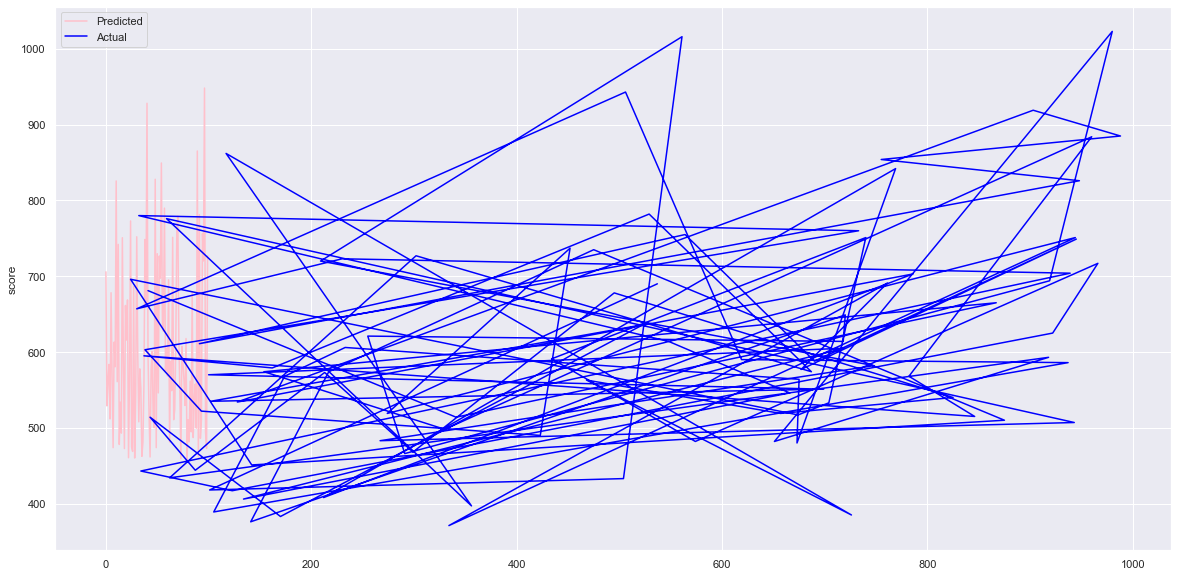

In [24]:
plt.figure(figsize = (20,10))

plt.plot(test_pred, label='Predicted', color='pink')
plt.plot(y_test, label='Actual', color='blue')

plt.ylabel('score')

plt.legend()
plt.show()

# 📈 Elastic Net

> A linear regression model trained with L1 and L2 prior as regularizer.

> This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. 

> Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

> A practical advantage of trading-off between Lasso and Ridge is it allows Elastic-Net to inherit some of Ridge’s stability under rotation.

> The objective function to minimize is in this case

$$\min_{w}{\frac{1}{2n_{samples}} \big|\big|X w - y\big|\big|_2 ^ 2 + \alpha \rho \big|\big|w\big|\big|_1 +
\frac{\alpha(1-\rho)}{2} \big|\big|w\big|\big|_2 ^ 2}$$
***

#### Pros
--> Doesn’t have the problem of selecting more than n predictors when n<<p, whereas LASSO saturates when n<<p.

#### Cons
--> Computationally more expensive than LASSO or Ridge.

In [25]:
%%time 

from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 40.76025853744642
MSE: 5093.390928513251
RMSE: 71.36799652864897
R2 Square 0.7598355448867619
__________________________________
Train set evaluation:
_____________________________________
MAE: 37.62201542352704
MSE: 3611.8087544308605
RMSE: 60.09832572069592
R2 Square 0.8536125170943848
__________________________________
CPU times: user 5.33 ms, sys: 1.23 ms, total: 6.56 ms
Wall time: 5.52 ms


In [26]:
%%time 

from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 40.76025853744642
MSE: 5093.390928513251
RMSE: 71.36799652864897
R2 Square 0.7598355448867619
__________________________________
Train set evaluation:
_____________________________________
MAE: 37.62201542352704
MSE: 3611.8087544308605
RMSE: 60.09832572069592
R2 Square 0.8536125170943848
__________________________________
CPU times: user 5.54 ms, sys: 1.61 ms, total: 7.15 ms
Wall time: 5.16 ms


In [27]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred)]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,37.101548,3221.378182,56.757186,0.848105
1,Ridge Regression,83.772326,227678.834186,477.157033,-9.735552
2,Lasso Regression,43.072527,4813.484257,69.379278,0.773034
3,Elastic Net Regression,40.760259,5093.390929,71.367997,0.759836


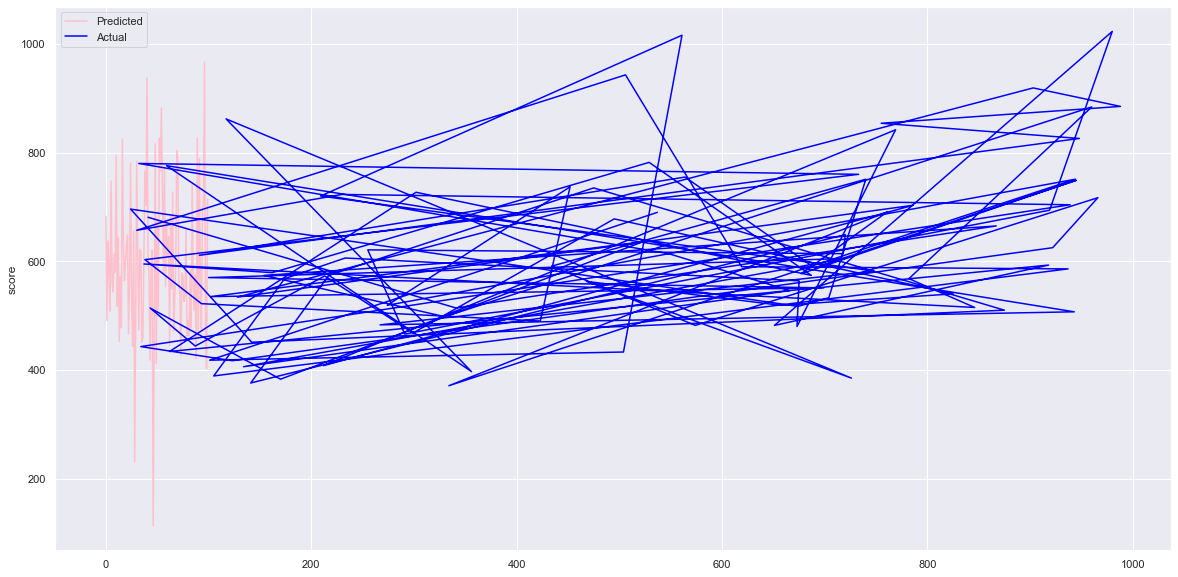

In [28]:
plt.figure(figsize = (20,10))

plt.plot(test_pred, label='Predicted', color='pink')
plt.plot(y_test, label='Actual', color='blue')

plt.ylabel('score')

plt.legend()
plt.show()

In [29]:
%%time

from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 29276.76972094067
MSE: 84284199493.88826
RMSE: 290317.4116271504
R2 Square -3974182.236709409
__________________________________
Train set evaluation:
_____________________________________
MAE: 26.448851119394774
MSE: 1502.667216370746
RMSE: 38.76425178396645
R2 Square 0.9390965340622074
__________________________________
CPU times: user 134 ms, sys: 17.1 ms, total: 151 ms
Wall time: 29.6 ms


In [30]:
%%time

from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 29276.76972094067
MSE: 84284199493.88826
RMSE: 290317.4116271504
R2 Square -3974182.236709409
__________________________________
Train set evaluation:
_____________________________________
MAE: 26.448851119394774
MSE: 1502.667216370746
RMSE: 38.76425178396645
R2 Square 0.9390965340622074
__________________________________
CPU times: user 88 ms, sys: 13.9 ms, total: 102 ms
Wall time: 19.4 ms


In [31]:
results_df_2 = pd.DataFrame(data=[["Polynomial Regression", *evaluate(y_test, test_pred)]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,37.101548,3.221378e+03,56.757186,8.481050e-01
1,Ridge Regression,83.772326,2.276788e+05,477.157033,-9.735552e+00
2,Lasso Regression,43.072527,4.813484e+03,69.379278,7.730338e-01
3,Elastic Net Regression,40.760259,5.093391e+03,71.367997,7.598355e-01
4,Polynomial Regression,29276.769721,8.428420e+10,290317.411627,-3.974182e+06


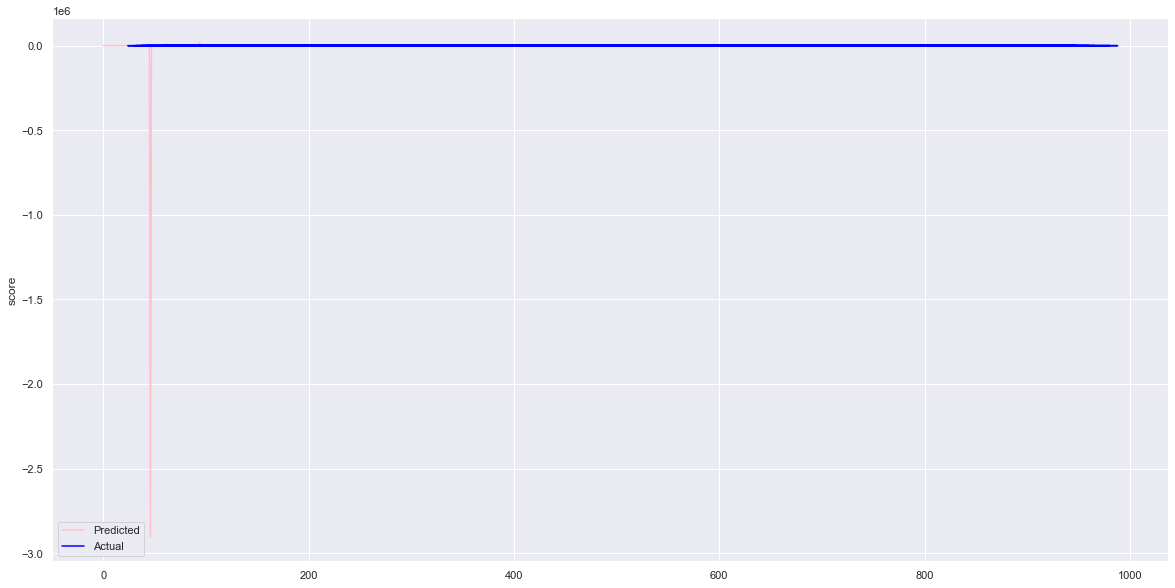

In [32]:
plt.figure(figsize = (20,10))

plt.plot(test_pred, label='Predicted', color='pink')
plt.plot(y_test, label='Actual', color='blue')

plt.ylabel('score')

plt.legend()
plt.show()

In [33]:
%%time

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 39.36301888179627
MSE: 4007.9173143269186
RMSE: 63.30811412707631
R2 Square 0.8110179855730795
__________________________________
Train set evaluation:
_____________________________________
MAE: 37.70940303848604
MSE: 3611.4068405122557
RMSE: 60.09498182471025
R2 Square 0.8536288067627724
__________________________________
CPU times: user 479 ms, sys: 30.8 ms, total: 510 ms
Wall time: 420 ms


In [34]:
%%time

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 39.716641030424796
MSE: 4240.142589790439
RMSE: 65.1163772778434
R2 Square 0.800068058986255
__________________________________
Train set evaluation:
_____________________________________
MAE: 37.70704715078562
MSE: 3611.6218403663047
RMSE: 60.09677063175945
R2 Square 0.8536200927666561
__________________________________
CPU times: user 400 ms, sys: 5.28 ms, total: 405 ms
Wall time: 404 ms


In [35]:
results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred)]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,37.101548,3.221378e+03,56.757186,8.481050e-01
1,Ridge Regression,83.772326,2.276788e+05,477.157033,-9.735552e+00
2,Lasso Regression,43.072527,4.813484e+03,69.379278,7.730338e-01
3,Elastic Net Regression,40.760259,5.093391e+03,71.367997,7.598355e-01
4,Polynomial Regression,29276.769721,8.428420e+10,290317.411627,-3.974182e+06
5,Stochastic Gradient Descent,39.716641,4.240143e+03,65.116377,8.000681e-01


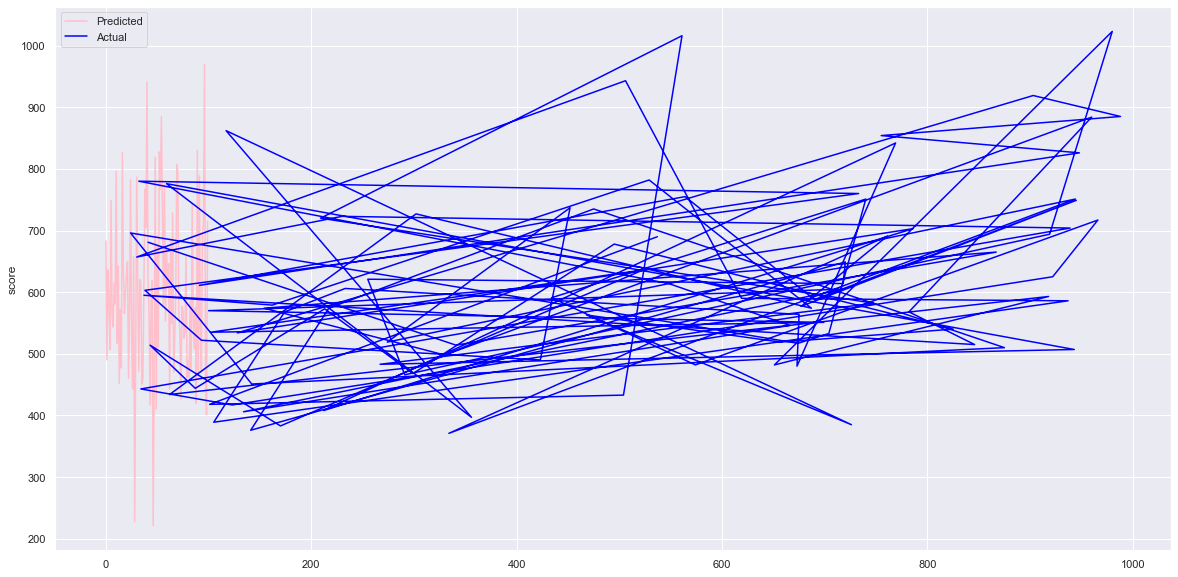

In [36]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

plt.figure(figsize = (20,10))

plt.plot(test_pred, label='Predicted', color='pink')
plt.plot(y_test, label='Actual', color='blue')

plt.ylabel('score')

plt.legend()
plt.show()

In [37]:
# from sklearn.neural_network import MLPRegressor

# mlp_reg = MLPRegressor(activation = 'relu',
#                        hidden_layer_sizes= (2, 6, 4),
#                        solver='lbfgs',
#                        verbose=True,
#                        max_iter=1000,
#                        learning_rate_init=0.001)

a

# mlp_reg.fit(X_train, y_train)
# y_pred = mlp_reg.predict(X_test)
# mlp_reg.score(X_train, y_train)
# r2_score(y_test, y_pred)

### -----------> OBSERVATION

<hr>

> Simpler models worked well for my data and having a single layer with many neurons did not perform well. ReLU activation worked better than logistic activation.

<hr>

# Random Forest Regressor

In [40]:
%%time

from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 5.964670000000005
MSE: 327.79832799000013
RMSE: 18.105201683218006
R2 Square 0.9845435962144519
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.295583333333333
MSE: 159.76868392171713
RMSE: 12.639963762674208
R2 Square 0.9935245365752683
__________________________________
CPU times: user 5.2 s, sys: 65.4 ms, total: 5.26 s
Wall time: 5.31 s


In [41]:
%%time

from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 5.887350000000001
MSE: 312.69836129000004
RMSE: 17.68327914415197
R2 Square 0.9852555924710973
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.267498737373738
MSE: 147.81316955934346
RMSE: 12.157843951924349
R2 Square 0.9940090964657117
__________________________________
CPU times: user 5.13 s, sys: 64.3 ms, total: 5.19 s
Wall time: 5.2 s


In [45]:
# results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
#                             columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
# results_df = results_df.append(results_df_2, ignore_index=True)
# results_df

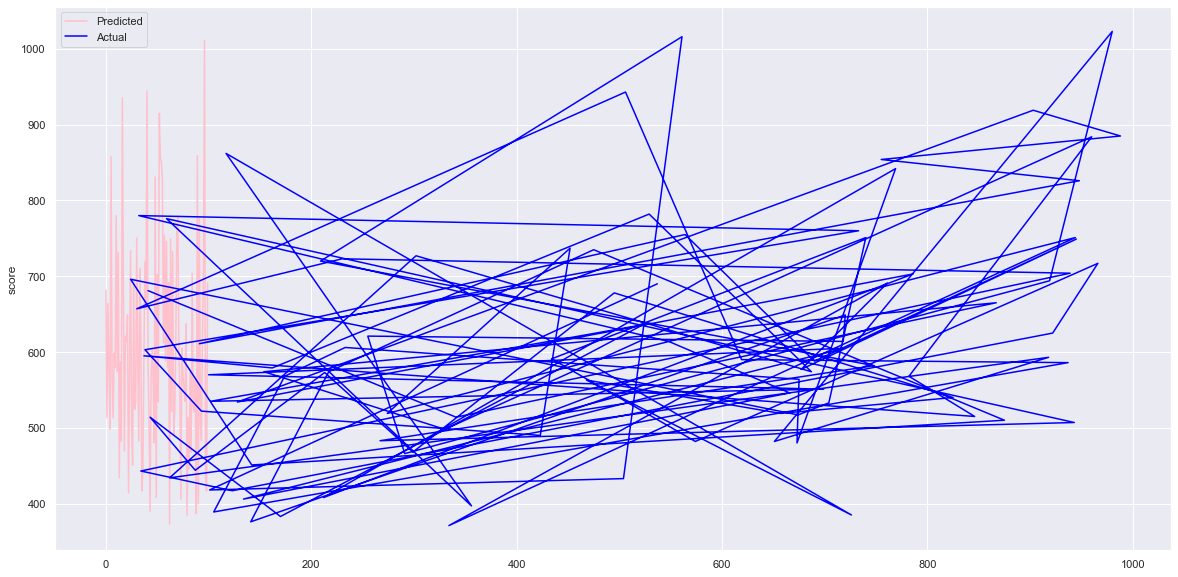

In [43]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

plt.figure(figsize = (20,10))

plt.plot(test_pred, label='Predicted', color='pink')
plt.plot(y_test, label='Actual', color='blue')

plt.ylabel('score')

plt.legend()
plt.show()

<a id="5"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>5. Model Comparision and Export</strong></h1>

In [48]:
# results_df.set_index('Model', inplace=True)
# results_df['R2 Square'].plot(kind='barh', figsize=(12, 8), color='pink')

In [ ]:
# import joblib

# # Save the model as a pickle in a file
# joblib.dump(lin_reg, 'lin_reg.pkl')
# joblib.dump(model, 'arti.pkl')
# joblib.dump(rf_reg, 'RandomForest.pkl')

<a id="7"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>6. References</strong></h1>

> Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. [“A Countrywide Traffic Accident Dataset.”](https://arxiv.org/abs/1906.05409), arXiv preprint arXiv:1906.05409 (2019). Access Nov 27, 2021.

> Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. [“Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights.”](https://arxiv.org/abs/1909.09638) In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019. Access Nov 27, 2021.

> SIGKDD International Conference on Knowledge Discovery & Data Mining. ACM. Access Dec 2, 2021.